In [53]:
import pandas as pd
from lhotse import SupervisionSegment, MonoCut, Fbank, LilcomFilesWriter
import sys
sys.path.append('./..')
from compute_features import create_manifest
import os
import pickle

In [31]:
# Define constants and load/create icsi manifest
SPLITS = ['train','dev','test']
data_dfs_dir = '../data/icsi/data_dfs/'
audio_dir = "../data/icsi/speech/"
transcript_dir= "../data/icsi/"
output_dir = "manifests"
data_dfs_dir = "../data/icsi/data_dfs"
icsi_manifest = create_manifest(audio_dir, transcript_dir, output_dir)

LOADING MANIFEST DIR FROM DISK - not from raw icsi files


In [32]:
# Load the channel to id mapping from disk
# If this changed at some point (which it shouldn't) this file would have to
# be recreated
# TODO: find a cleaner way to implement this
chan_map_file = open(os.path.join(data_dfs_dir, 'chan_idx_map.pkl'), 'rb')
chan_idx_map = pickle.load(chan_map_file)

In [33]:
# Read data_dfs containing the samples for train,val,test split
data_dfs = {}
for split in SPLITS:
    data_dfs[split] = pd.read_csv(os.path.join(
        data_dfs_dir, f'{split}_df.csv'))

data_dfs['dev']

,Unnamed: 0,start,duration,sub_start,sub_duration,audio_path,label
0,0,626.97,1.30,627.26,1.00,Bmr021/chan5.sph,0
1,1,1614.02,1.30,1614.28,1.00,Bmr021/chan0.sph,0
2,2,1793.94,1.30,1793.99,1.00,Bmr021/chan4.sph,0
3,3,2189.98,1.30,2190.22,1.00,Bmr021/chan4.sph,0
4,4,1050.24,1.30,1050.53,1.00,Bmr021/chan1.sph,0
...,...,...,...,...,...,...,...
1238,1238,5853.28,1.47,5853.40,1.00,Bns001/chanA.sph,1
1239,1239,5853.56,1.60,5854.16,1.00,Bns001/chan4.sph,1
1240,1240,5855.58,0.85,5855.58,0.85,Bns001/chan4.sph,1
1241,1241,5946.84,1.80,5947.21,1.00,Bns001/chanA.sph,1


In [34]:
# Get segments that are shorter than 1s -> this is where the error occured
df = data_dfs['dev']
df = df[df.duration < 1]
df

,Unnamed: 0,start,duration,sub_start,sub_duration,audio_path,label
1134,1134,132.63,0.60,132.63,0.60,Bmr021/chan1.sph,1
1137,1137,264.90,0.80,264.90,0.80,Bmr021/chan2.sph,1
1138,1138,265.16,0.80,265.16,0.80,Bmr021/chan3.sph,1
1145,1145,293.83,0.82,293.83,0.82,Bmr021/chan3.sph,1
1146,1146,297.91,0.69,297.91,0.69,Bmr021/chan2.sph,1
1147,1147,386.37,0.86,386.37,0.86,Bmr021/chan5.sph,1
1155,1155,616.88,0.57,616.88,0.57,Bmr021/chan2.sph,1
1156,1156,622.47,0.91,622.47,0.91,Bmr021/chan3.sph,1
1163,1163,758.36,0.79,758.36,0.79,Bmr021/chan2.sph,1
1164,1164,759.09,0.78,759.09,0.78,Bmr021/chan4.sph,1


In [35]:
# Take one row from this dataframe (with segments shorter than 1sec)
row = df.iloc[0]
row

Unnamed: 0                  1134
start                     132.63
duration                     0.6
sub_start                 132.63
sub_duration                 0.6
audio_path      Bmr021/chan1.sph
label                          1
Name: 1134, dtype: object

In [70]:
meeting_id = row.audio_path.split('/')[0]
channel = row.audio_path.split('/')[1].split('.')[0]
chan_id = chan_idx_map[meeting_id][channel]
rec = icsi_manifest['dev']['recordings'][meeting_id]
# Create supervision segment indicating laughter or non-laughter by passing a
# dict to the custom field -> {'is_laugh': 0/1}
# TODO: change duration from hardcoded to a value from a config file

sup = SupervisionSegment(id=f'sup_test_cut', recording_id=rec.id, start=row.sub_start,
                         duration=1.0, channel=chan_id, custom={'is_laugh': row.label})

# Pad cut-subsample to a minimum of 1s
# Do this because there are laugh segments that are shorter than 1s
cut = MonoCut(id=f'test_cut', start=row.sub_start, duration=row.sub_duration,
              recording=rec, channel=chan_id, supervisions=[sup]).pad(duration=1.0, preserve_id=True)

print('====BEFORE FEATURE COMPUTATION')
print('Recording:')
print(cut.recording)
print('\nCut:')
print(cut)
cut.channel

====BEFORE FEATURE COMPUTATION
Recording:
Recording(id='Bmr021', sources=[AudioSource(type='file', channels=[0], source='../data/icsi/speech/Bmr021/chan0.sph'), AudioSource(type='file', channels=[1], source='../data/icsi/speech/Bmr021/chan1.sph'), AudioSource(type='file', channels=[2], source='../data/icsi/speech/Bmr021/chan2.sph'), AudioSource(type='file', channels=[3], source='../data/icsi/speech/Bmr021/chan3.sph'), AudioSource(type='file', channels=[4], source='../data/icsi/speech/Bmr021/chan4.sph'), AudioSource(type='file', channels=[5], source='../data/icsi/speech/Bmr021/chan5.sph'), AudioSource(type='file', channels=[6], source='../data/icsi/speech/Bmr021/chan6.sph'), AudioSource(type='file', channels=[7], source='../data/icsi/speech/Bmr021/chan7.sph')], sampling_rate=16000, num_samples=35391062, duration=2211.941375, transforms=None)

Cut:
MixedCut(id='test_cut', tracks=[MixTrack(cut=MonoCut(id='test_cut', start=132.63, duration=0.6, channel=1, supervisions=[SupervisionSegment(i

1

====AFTER FEATURE COMPUTATION
Recording:
None

Cut:
MonoCut(id='test_cut', start=0, duration=1.0, channel=0, supervisions=[SupervisionSegment(id='sup_test_cut', recording_id='Bmr021', start=132.63, duration=1.0, channel=1, text=None, language=None, speaker=None, gender=None, custom={'is_laugh': 1}, alignment=None)], features=Features(type='kaldi-fbank', num_frames=100, num_features=80, frame_shift=0.01, sampling_rate=16000, start=0, duration=1.0, storage_type='lilcom_files', storage_path='tmp', storage_key='348/348c48e8-becf-47a8-a2fa-90aa6a2a1d95.llc', recording_id=None, channels=0), recording=None, custom=None)


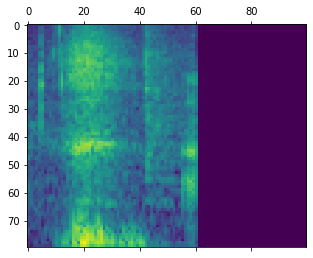

In [77]:
if (len(cut.tracks) > 1): 
    monocut_rec = cut.tracks[0].cut.recording

feat_cut = cut.compute_and_store_features(extractor=Fbank(), storage=LilcomFilesWriter('tmp'))
feat_cut.plot_features()
# if(not feat_cut.has_recording):
#      feat_cut.recording = monocut_rec
        
print('====AFTER FEATURE COMPUTATION')
print('Recording:')
print(feat_cut.recording)
print('\nCut:')
feat_cut.supervisions[0].recording_id
#feat_cut.features.channels = 3

print(feat_cut)